In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Dataset

In [23]:
df = pd.read_csv('baby-weights-dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        101400 non-null  int64  
 1   SEX       101400 non-null  int64  
 2   MARITAL   101400 non-null  int64  
 3   FAGE      101400 non-null  int64  
 4   GAINED    101399 non-null  float64
 5   VISITS    101400 non-null  int64  
 6   MAGE      101400 non-null  int64  
 7   FEDUC     101399 non-null  float64
 8   MEDUC     101400 non-null  int64  
 9   TOTALP    101400 non-null  int64  
 10  BDEAD     101400 non-null  int64  
 11  TERMS     101400 non-null  int64  
 12  LOUTCOME  101400 non-null  int64  
 13  WEEKS     101399 non-null  float64
 14  RACEMOM   101400 non-null  int64  
 15  RACEDAD   101400 non-null  int64  
 16  HISPMOM   101400 non-null  object 
 17  HISPDAD   101400 non-null  object 
 18  CIGNUM    101399 non-null  float64
 19  DRINKNUM  101400 non-null  int64  
 20  ANEM

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000


# Data Cleaning & Transformation

In [24]:
df = df.drop(['ID','FEDUC','MEDUC','RACEMOM','RACEDAD','HISPMOM','HISPDAD','CIGNUM','DRINKNUM','ACLUNG','HERPES','HYDRAM','HEMOGLOB','HYPERCH','HYPERPR','RENAL','RHSEN','UTERINE','BDEAD','TERMS','LOUTCOME'], axis = 1)

In [25]:
df = df.rename(columns =  {'FAGE':'father_age','GAINED':'weight_gain','SEX':'gender','MARITAL':'marital_status','VISITS':'doc_visits','MAGE':'mother_age','TOTALP':'t_pregnancies','WEEKS':'weeks','ANEMIA':'anemia','CARDIAC':'cardiac','ECLAMP':'eclampsia','CERVIX':'cervix','PINFANT':'prev_infant','PRETERM':'prev_preterm','BWEIGHT':'baby_weight','DIABETES':'diabetes'})

In [26]:
df = df[df['gender']<9]

# Checking & Removing Null Values

In [27]:
df.isnull().sum()

gender            0
marital_status    0
father_age        0
weight_gain       1
doc_visits        0
mother_age        0
t_pregnancies     0
weeks             1
anemia            0
cardiac           0
diabetes          0
eclampsia         0
cervix            0
prev_infant       0
prev_preterm      0
baby_weight       0
dtype: int64

In [28]:
df.dropna(inplace = True)

# Checking & Removing Duplicates

In [29]:
df.duplicated().sum()

28

In [30]:
df.drop_duplicates(inplace = True)

# Changing Data Types

In [60]:
df.weight_gain = df.weight_gain.astype(int)
df.weeks = df.weeks.astype(int)
#df.baby_weight = df.baby_weight.round(0).astype(int)

In [31]:
df.describe()

,gender,marital_status,father_age,weight_gain,doc_visits,mother_age,t_pregnancies,weeks,anemia,cardiac,diabetes,eclampsia,cervix,prev_infant,prev_preterm,baby_weight
count,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000,101369.000000
mean,1.485592,1.303870,30.175093,30.283420,12.436968,27.736507,2.378548,38.735669,0.035612,0.004252,0.033077,0.003808,0.003739,0.005682,0.008859,7.258077
std,0.499795,0.459929,6.776194,13.616937,3.729176,5.957964,1.490370,2.504408,0.185323,0.065067,0.178839,0.061591,0.061032,0.075166,0.093703,1.329384
min,1.000000,1.000000,14.000000,0.000000,0.000000,11.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500
25%,1.000000,1.000000,25.000000,21.000000,10.000000,23.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.625000
50%,1.000000,1.000000,30.000000,30.000000,12.000000,28.000000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.375000
75%,2.000000,2.000000,35.000000,39.000000,15.000000,32.000000,3.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.062500
max,2.000000,2.000000,74.000000,98.000000,49.000000,53.000000,20.000000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.062500


# Correlation of Different Factors with Baby Weight

marital_status   -0.107100
father_age        0.051351
weight_gain       0.173230
doc_visits        0.129504
mother_age        0.068412
t_pregnancies     0.003248
weeks             0.565211
anemia           -0.011491
cardiac          -0.000426
diabetes          0.010217
eclampsia        -0.068088
cervix           -0.066950
prev_infant       0.067087
prev_preterm     -0.072948
baby_weight       1.000000
Name: baby_weight, dtype: float64


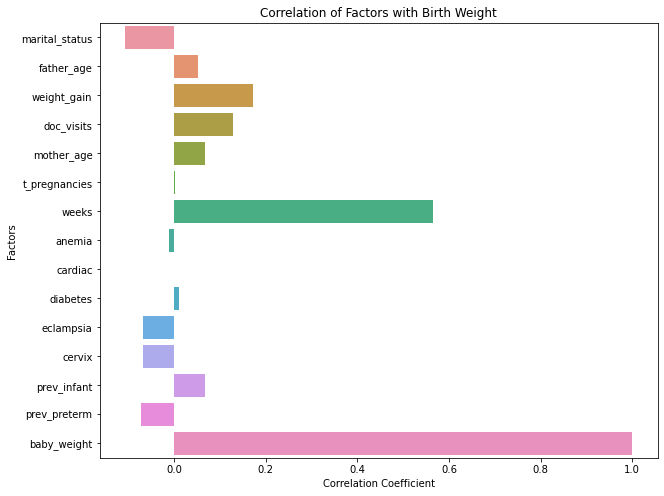

In [33]:
factors = ['marital_status','father_age','weight_gain','doc_visits','mother_age','t_pregnancies','weeks','anemia','cardiac','diabetes','eclampsia','cervix','prev_infant','prev_preterm']
correlation = df[factors + ['baby_weight']].corr()['baby_weight']
print(correlation)

plt.figure(figsize = (10,8))
sns.barplot(x = correlation.values, y = correlation.index)
plt.title('Correlation of Factors with Birth Weight')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Factors')
plt.show()

In [36]:
df['gender'] = df.gender.replace([1,2],['M','F'])
df['marital_status'] = df.marital_status.replace([1,2],['Married','Single'])
df['anemia'] = df.anemia.replace([0,1], ['No','Yes'])
df['cardiac'] = df.cardiac.replace([0,1], ['No','Yes'])
df['diabetes'] = df.diabetes.replace([0,1], ['No','Yes'])
df['eclampsia'] = df.eclampsia.replace([0,1], ['No','Yes'])
df['cervix'] = df.cervix.replace([0,1], ['No','Yes'])
df['prev_infant'] = df.prev_infant.replace([0,1], ['No','Yes'])
df['prev_preterm'] = df.prev_preterm.replace([0,1], ['No','Yes'])
print(df)

       gender marital_status  father_age  weight_gain  doc_visits  mother_age  \
0           F        Married          33         26.0          10          34   
1           F         Single          19         40.0          10          18   
2           F        Married          33         16.0          14          31   
3           M        Married          25         40.0          15          28   
4           M         Single          21         60.0          13          20   
...       ...            ...         ...          ...         ...         ...   
101395      M         Single          36          0.0           9          34   
101396      F         Single          21         39.0          11          19   
101397      F        Married          27         37.0          15          22   
101398      M        Married          27         26.0          12          24   
101399      M         Single          20         31.0          15          17   

        t_pregnancies  week

# Baby Gender Distribution

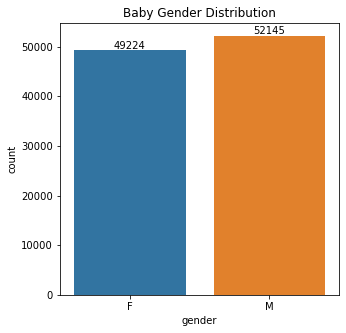

In [37]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x="gender")
ax.bar_label(ax.containers[0])
plt.title("Baby Gender Distribution")
plt.show()

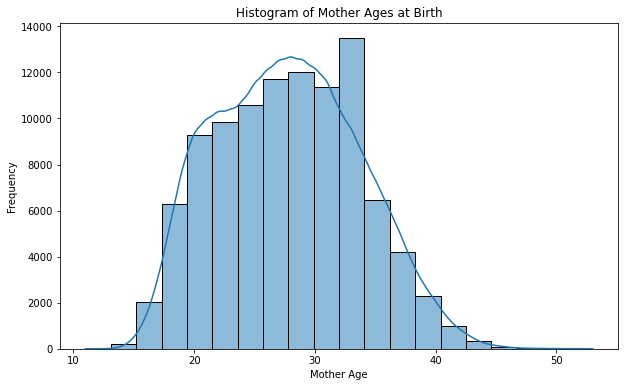

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mother_age'], bins=20, kde=True)
plt.title('Histogram of Mother Ages at Birth')
plt.xlabel('Mother Age')
plt.ylabel('Frequency')
plt.show()

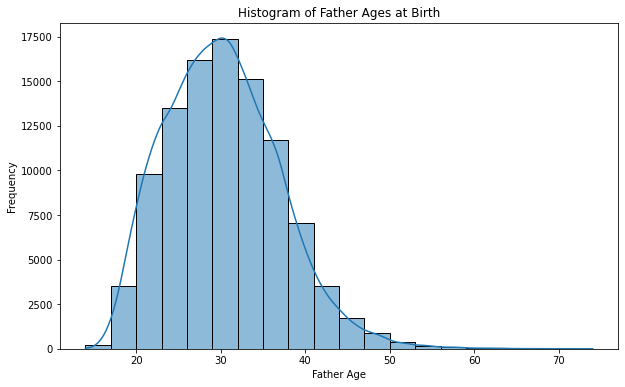

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['father_age'], bins=20, kde=True)
plt.title('Histogram of Father Ages at Birth')
plt.xlabel('Father Age')
plt.ylabel('Frequency')
plt.show()

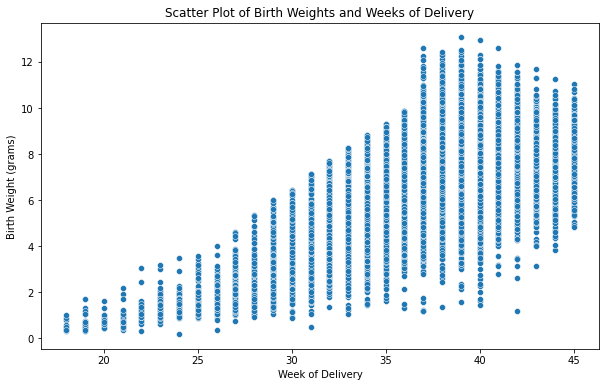

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['weeks'], y=df['baby_weight'])
plt.title('Scatter Plot of Birth Weights and Weeks of Delivery')
plt.xlabel('Week of Delivery')
plt.ylabel('Birth Weight (grams)')
plt.show()

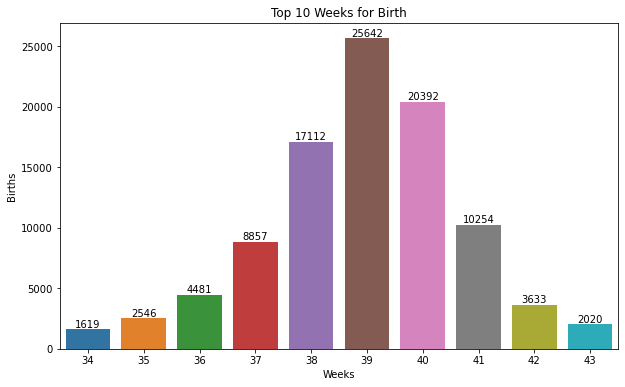

In [85]:
plt.figure(figsize=(10,6))
top_weeks = df.weeks.value_counts()[:10]
ax=sns.barplot(data=df, x=top_weeks.index, y=top_weeks.values)
ax.bar_label(ax.containers[0])
plt.title("Top 10 Weeks for Birth")
plt.xlabel('Weeks')
plt.ylabel('Births')
plt.show()

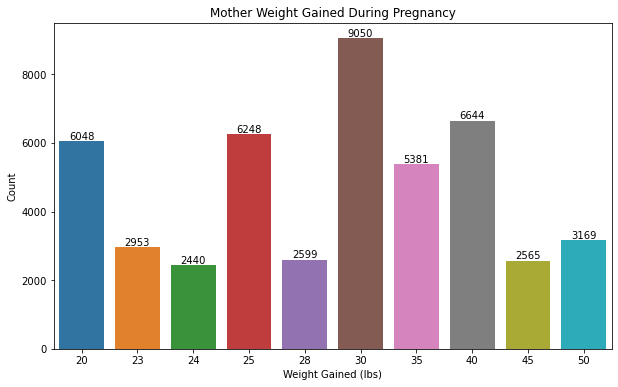

In [101]:
plt.figure(figsize=(10,6))
top_weight_gained = df.weight_gain.value_counts()[:10]
ax=sns.barplot(data=df, x=top_weight_gained.index, y=top_weight_gained.values)
ax.bar_label(ax.containers[0])
plt.title("Mother Weight Gained During Pregnancy")
plt.xlabel('Weight Gained (lbs)')
plt.ylabel('Count')
plt.show()

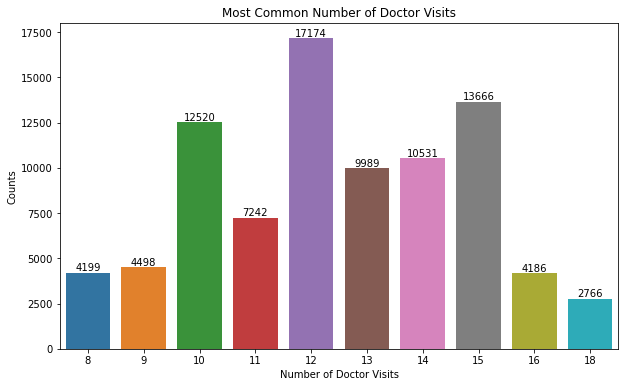

In [103]:
plt.figure(figsize=(10,6))
top_visits = df.doc_visits.value_counts()[:10]
ax=sns.barplot(data=df, x=top_visits.index, y=top_visits.values)
ax.bar_label(ax.containers[0])
plt.title("Most Common Number of Doctor Visits")
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Counts')
plt.show()

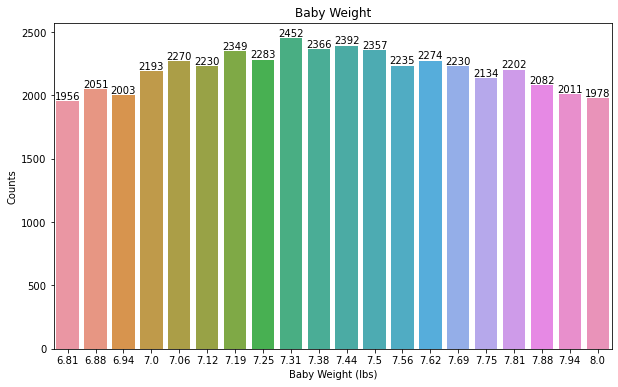

In [113]:
plt.figure(figsize=(10,6))
top_bweight = df.baby_weight.round(2).value_counts().head(20)
ax=sns.barplot(data=df, x=top_bweight.index, y=top_bweight.values)
ax.bar_label(ax.containers[0])
plt.title("Baby Weight")
plt.xlabel('Baby Weight (lbs)')
plt.ylabel('Counts')
plt.show()